# In-class exercises Class 21

---

Today we will investigate a new tool called Pandas.  Pandas is built on numpy to add useful functionallity for data analysis.   We will use numpy and pandas in today's notebook.  Also, we will make some plots, so let's include what we need.


At first, pandas will seem like an extra layer that isn't necessary, but I promise it will be very very useful.  Just bear with me for another class or two and you will see how powerful it is!  



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The primary data structures in pandas are implemented as two classes:

    - DataFrame: which you can imagine as a relational data table, with rows and named columns.  This is many series, combined together, as defined below.  
    - Series: which is a single column. A DataFrame contains one or more Series and a name for each Series. This is basically a numpy attay, with a label attached to it.  

The data frame is a commonly used for data analysis.  We will use data frames to see how it can make data analysis easier and it is a common tool used to make accessing data science tools easier.  

We can fill data frames by hand by first making some series and them combining them into data frames:

In [20]:
city_names = pd.Series(['Norfolk', 'Charlottesville', 'Williamsburg'])
population = pd.Series([240000, 47000, 14000])
city_size = pd.Series([54, 10 , 9])  #sq miles

cities = pd.DataFrame({ 'City name': city_names, 'Population': population, 'City size':city_size })

print(cities)


         City name  Population  City size
0          Norfolk      240000         54
1  Charlottesville       47000         10
2     Williamsburg       14000          9


We can get access to a single "series" using its name.  Once we have access to a series it is basically like a numpy array, and we can do all of the the things we learned how to do with numpy arrays!

In [21]:
pop = cities['Population']
print(pop)


0    240000
1     47000
2     14000
Name: Population, dtype: int64


Once we have a series, we can plot this series in several different ways (that we already learned) with matplotlib.  Here I'll show some basic examples.  

Text(0, 0.5, 'Population')

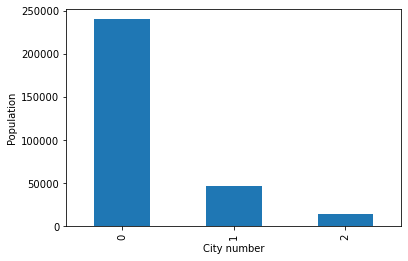

In [22]:
pop.plot(kind="bar")
plt.xlabel('City number')
plt.ylabel('Population')

It would be much more awesome if we had the city name on the x-axis.  Can we do that?  We can do it easily if we plot directly from the data frame!  

Text(0, 0.5, 'Population')

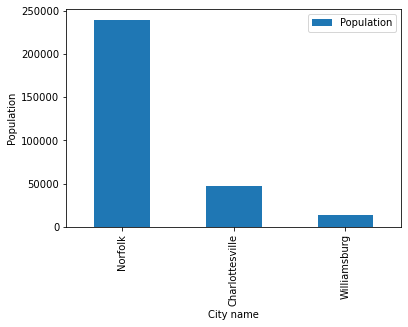

In [23]:
cities.plot(x="City name", y="Population", kind="bar")
plt.ylabel('Population')


Wow - that was pretty easy to make a pretty nice plot!  

<AxesSubplot:xlabel='City size', ylabel='Population'>

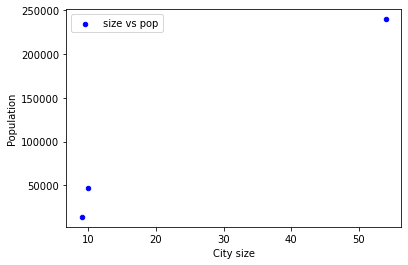

In [24]:
cities.plot.scatter(x='City size', y='Population', 
                     color='Blue', label='size vs pop')

Interesting, but it might be more enlightening with a few more cities...  

## **EXERCISE 1**:  
<span style="color:red">  Make a new "cities" DataFrame but add your home town as the 4th city. Print the data frame to the screen.    </red>
    

 
    
    
   

In [25]:
#put your code here.

## **EXERCISE 2**:  
<span style="color:red">  Make a pandas DataFrame called "MyClasses" with three series:  1) a short 'name' of each class you are in this semester 2) the approximate number of students 'N_students' in each class and 3) a ranking of your 'preference'for the class - one meaning that you like it the most.  Print the DataFrame to the screen.    </red>
    

 
    
    
   

In [26]:
#Put your code here...  

## **EXERCISE 3**:  
<span style="color:red">  I told you that you can basically use a pandas series like a numpy array.  Can you plot the scatter plot (correlation) between 'N_students' and 'preference' from above.  From this data do you prefer large or small classes?      </red>
    

 
    
    
   

In [27]:
#Put your code here...  

Let's try a pie chart - for fun :-)


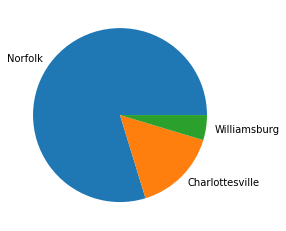

In [28]:
# plotting a pie chart
plt.pie(cities["Population"], labels=cities["City name"])
plt.show()

Wow, It doesn't get easier than that!  

---

## Back to the Iris dataset.

When we fist looked at the iris dataset it was in a single file in CVS format (comma seperated values).  We had to do some text manipulation to get it in an easy form to use with numpy.  Let's start with the CVS file again and see how pandas helps us avoid that extra work for reading in and converting the file.  I copied the data file into the GitHub repository, so you should have access.

As seen above it is possible to load a pandas DataFrame "by hand", but there are many other ways to do it, and pandas can just read in a CVS file (amoung other file types) directly into a DataFrame.  Let's try it.  




In [29]:
iris_df = pd.read_csv('data/iris.data')
iris_df.head()   #Will show the top few lines of the DataFrame


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Or we can display 5 random rows:

In [30]:
iris_df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
137,6.4,3.1,5.5,1.8,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica
93,5.0,2.3,3.3,1.0,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica


If we just want to see the names of the collums:

In [31]:
iris_df.columns


Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

Or, we can check the "shape" of the DataFrame:

In [32]:
iris_df.shape

(150, 5)

Good - it has 150 rows (50 for each variety), and 5 collums as expected.  

Great - we got it loaded in one line of code and it looks like the dataset we used in the past based on a few quick checks!  

Now let's figure out how to do some of the things we did before when we had three numpy arrays - one for each variety.  Of course, we could select out those series, and then do exactly what we did before. Or, we could work directly with the DataFrame.  



Let's make a 1-D histogram for all three species combined for one variable first.  Remember - *once we index a single collumn (in this case 'sepal.length', we can treat it like a numpy array and use all the plotting features that we used in the past*!  


Text(0.5, 1.0, 'Sepal Length - all species!!')

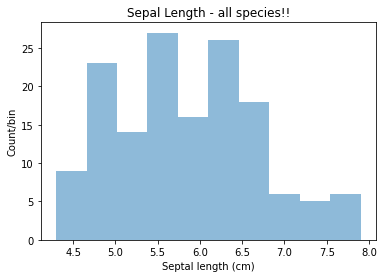

In [33]:
plt.hist(iris_df['sepal.length'],label="All Varieties",alpha=.5)
#iris_df['sepal.length'] selects out a single collumn!  


plt.xlabel("Septal length (cm)")
plt.ylabel("Count/bin")
plt.title("Sepal Length - all species!!")

What if we only want to draw this distribution for a single species - setosa, for example?  First I can select (or index) the species I want, and then I can index the distribution.  Like this!

Text(0.5, 1.0, 'Sepal Length - Setosa!!')

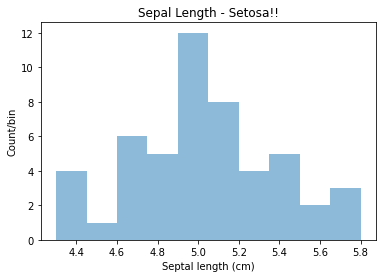

In [34]:
plt.hist(iris_df[iris_df["variety"] == "Iris-setosa"]["sepal.length"],label="setosa",alpha=.5)
#[iris_df["variety"] == "Iris-setosa"] selects out all rows for which variety=setosa
#of those rows selected:  iris_df['sepal.length'] selects out a single collumn!  
plt.xlabel("Septal length (cm)")
plt.ylabel("Count/bin")
plt.title("Sepal Length - Setosa!!")

Let's do all three on the same plot:

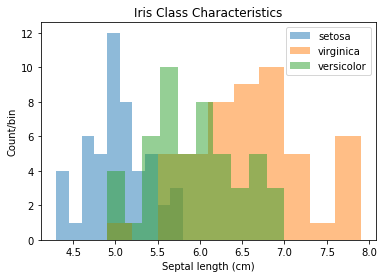

In [35]:
plt.figure()  #Need this before we are able to save a plot to file!!!
plt.hist(iris_df[iris_df["variety"] == "Iris-setosa"]["sepal.length"],label="setosa",alpha=.5)
plt.hist(iris_df[iris_df["variety"] == "Iris-virginica"]["sepal.length"],label="virginica",alpha=.5)
plt.hist(iris_df[iris_df["variety"] == "Iris-versicolor"]["sepal.length"],label="versicolor",alpha=.5)

# Adding Title
plt.legend()
plt.title("Iris Class Characteristics")
  
# Labeling the axes
plt.xlabel("Septal length (cm)")
plt.ylabel("Count/bin")
 
plt.savefig('septal_length.png')

## **EXERCISE 3**:  
<span style="color:red">  Make the same plot for Petal width.        </red>
    

 
    
    
   

In [36]:
#Put your code here...  

It is possible to work directly with data frames and make scatter plots.  First let's do it with one variable and all species on the same plot...  

Text(0.5, 1.0, 'All species!')

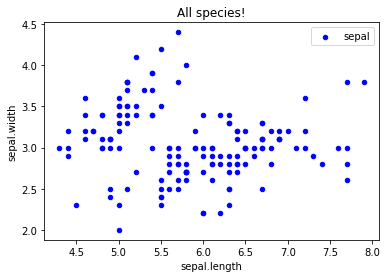

In [37]:

                
iris_df.plot.scatter(x='sepal.length', y='sepal.width', 
                     color='Blue', label='sepal')
plt.title("All species!")


That was pretty nice, but it includes all three species.  We can select out one species like this...  

In [38]:
setosa_df = iris_df[iris_df["variety"] == "Iris-setosa"]  #Make a dataFrame that only containes setosa.  
setosa_df.sample(5)  #Let's make sure it only containes setosa...



,sepal.length,sepal.width,petal.length,petal.width,variety
7,5.0,3.4,1.5,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Looks good.  Lets plot it...  

Text(0.5, 1.0, 'Setosa Only!')

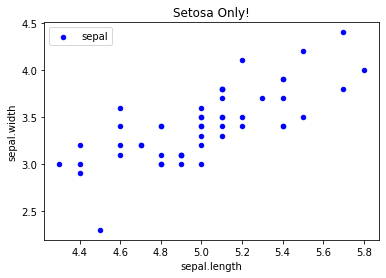

In [39]:
setosa_df.plot.scatter(x='sepal.length', y='sepal.width', 
                     color='Blue', label='sepal')
plt.title("Setosa Only!")

We could have drawn the plot in a single step (without first making a new data frame).  We could do it like this:  

Text(0.5, 1.0, 'Setosa Only!')

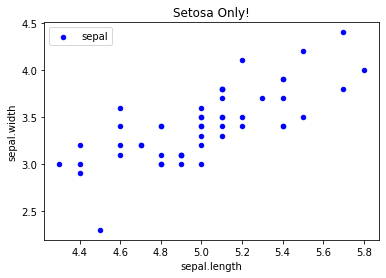

In [40]:
iris_df[iris_df["variety"] == "Iris-setosa"].plot.scatter(x='sepal.length', y='sepal.width', 
                     color='Blue', label='sepal')
plt.title("Setosa Only!")

We can plot them all:

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

<Figure size 432x288 with 0 Axes>

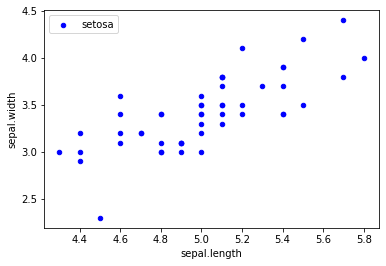

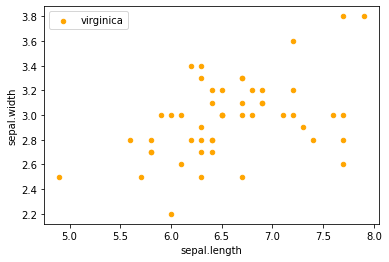

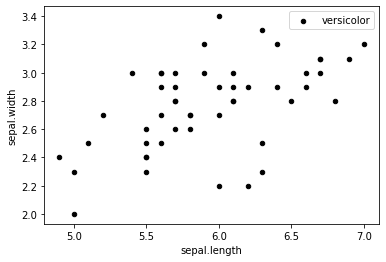

In [41]:
plt.figure()

iris_df[iris_df["variety"] == "Iris-setosa"].plot.scatter(x='sepal.length', y='sepal.width', 
                     color='Blue', label='setosa')

iris_df[iris_df["variety"] == "Iris-virginica"].plot.scatter(x='sepal.length', y='sepal.width', 
                     color='orange', label='virginica')

iris_df[iris_df["variety"] == "Iris-versicolor"].plot.scatter(x='sepal.length', y='sepal.width', 
                     color='black', label='versicolor')

It wasn't obvious to me how to put them on the same figure drawing directly from the data frame (maybe you can figure it out for HW?).  So, I had to go back to the way we did it before (using plt.scatter).  I simply constructed the series that I wanted and treated it like a numpy array for plotting in matplotlib:  

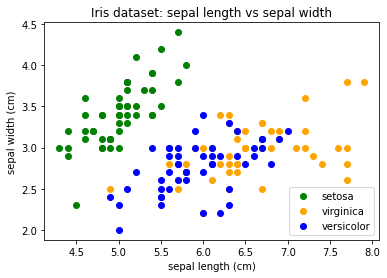

In [42]:
colors = ['green', 'orange', 'blue']
label_species = ['setosa' ,'virginica', 'versicolor']

plt.scatter(  
        iris_df[iris_df["variety"] == "Iris-setosa"]['sepal.length'],        
        iris_df[iris_df["variety"] == "Iris-setosa"]['sepal.width'],
        color=colors[0],              
        label=label_species[0]   
)

plt.scatter(  
        iris_df[iris_df["variety"] == "Iris-virginica"]['sepal.length'],        
        iris_df[iris_df["variety"] == "Iris-virginica"]['sepal.width'],
        color=colors[1],              
        label=label_species[1]   
)

plt.scatter(  
        iris_df[iris_df["variety"] == "Iris-versicolor"]['sepal.length'],        
        iris_df[iris_df["variety"] == "Iris-versicolor"]['sepal.width'],
        color=colors[2],              
        label=label_species[2]   
)


plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris dataset: sepal length vs sepal width')
plt.legend(loc='lower right')

plt.show()


## **EXERCISE 4**:  
<span style="color:red"> Make the same plot, but for pedal length v/s pedal width.  Would this correlation be useful in telling the difference between the three classes, how?       </red>

In [ ]:
#Put your code here

Put your comments here.

## **EXERCISE 5**:  
<span style="color:red"> Compare the correlatin coefficient for the three classes from excercize 4 (using the data frame).       </red>

In [ ]:
#Put your code here

Put your comments here.